## Airbnb data analysis ( Exploratory Notes )

Visualizing...

First 20 rows of the Airbnb data
Saved table data image of first 20 rows to: /Users/raybags/Desktop/personal/projects-rep/assesment1/scratch/v_images/airbnb_data_rows_table.png


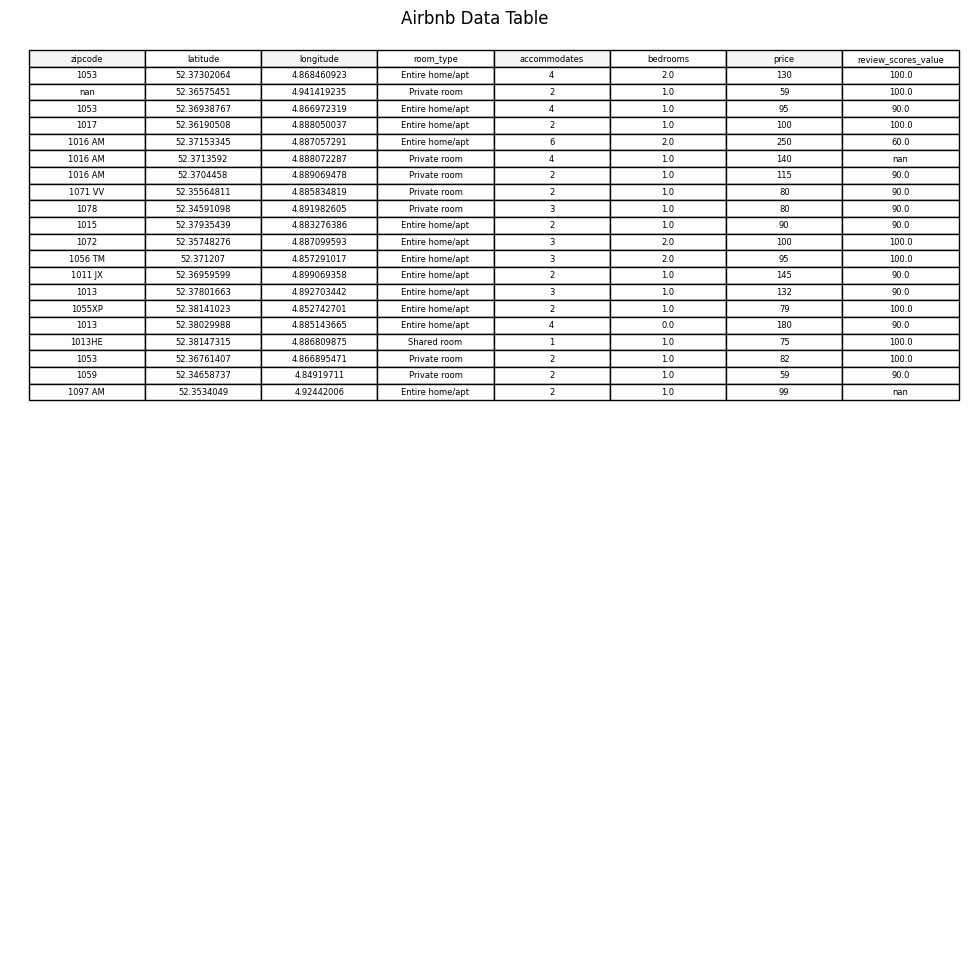

Saved room type distribution plot to: /Users/raybags/Desktop/personal/projects-rep/assesment1/scratch/v_images/airbnb_room_type_distribution.png
Saved average price per room type plot to: /Users/raybags/Desktop/personal/projects-rep/assesment1/scratch/v_images/airbnb_average_price_per_room_type.png
Saved latitude vs longitude with price scatter plot to: /Users/raybags/Desktop/personal/projects-rep/assesment1/scratch/v_images/airbnb_latitude_longitude_price_scatter.png


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

def visualize_airbnb_data(showVisuals: bool = False) -> None:
    """
    Visualizes data from airbnb.csv file and optionally displays plots in the UI.
    
    Arguments:
    - showVisuals (bool): Flag controles visualization display. Default is False.
    """

    print("Visualizing...")

    cwd = Path.cwd()
    root_path = cwd.parent

    images_dir = root_path / 'scratch' / 'v_images'
    if not images_dir.exists():
        print(f"Creating directory: {images_dir}")
        images_dir.mkdir(parents=True, exist_ok=True)

    file_path = root_path / 'data' / 'airbnb.csv'

    if not file_path.exists():
        print(f"Error: File '{file_path}' does not exist.")
        return

    # Load CSV data into a DataFrame
    try:
        df = pd.read_csv(file_path)

        # Data cleaning
        df['price'] = pd.to_numeric(df['price'].astype(str).str.extract(r'(\d+)')[0], errors='coerce')

        # Remove rows where 'price' is NaN after cleaning
        df = df.dropna(subset=['price'])

        #=============== TABLE ==============
        #=====================================
        print("\nFirst 20 rows of the Airbnb data")

        # Creating a table
        plt.figure(figsize=(12, 12))  # Adjusting height to 12
        plt.axis('off')  # Hide the axis
        
        # Create striped colors for the table
        colors = [['#f5f5f5', '#ffffff'][i % 2] for i in range(len(df.columns))]
        
        table = plt.table(cellText=df.head(20).values,
                          colLabels=df.columns,
                          cellLoc='center',
                          loc='upper left',
                          colColours=colors,
                          fontsize=14)  # Increase font size
        
        plt.title('Airbnb Data Table')
        plt.savefig(images_dir / 'airbnb_data_rows_table.png', bbox_inches='tight')
        print(f"Saved table data image of first 20 rows to: {images_dir / 'airbnb_data_rows_table.png'}")

        plt.show()
        plt.close()
        #=====================================
        # =============== TABLE ==============

        # Pie chart for distribution of room types
        plt.figure(figsize=(8, 6))
        pie_plot = df['room_type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
        plt.title('Distribution of Room Types')
        plt.ylabel('')
        plt.legend(title="Room Type", loc="upper left", bbox_to_anchor=(1, 0.5), labels=df['room_type'].value_counts().index.tolist())
        plt.savefig(images_dir / 'airbnb_room_type_distribution.png', bbox_inches='tight')
        print(f"Saved room type distribution plot to: {images_dir / 'airbnb_room_type_distribution.png'}")

        if showVisuals:
            plt.show()
        else:
            plt.close()

        # Average price per room type
        avg_price = df.groupby('room_type')['price'].mean().sort_values(ascending=False)

        plt.figure(figsize=(10, 6))
        bar_plot = avg_price.plot(kind='bar')
        plt.title('Average Price per Room Type')
        plt.ylabel('Average Price')
        plt.xlabel('Room Type')
        plt.legend(title="Room Type", loc="upper right")
        plt.savefig(images_dir / 'airbnb_average_price_per_room_type.png')
        print(f"Saved average price per room type plot to: {images_dir / 'airbnb_average_price_per_room_type.png'}")

        if showVisuals:
            plt.show()
        else:
            plt.close()

        # Scatter plot for latitude vs longitude
        plt.figure(figsize=(10, 6))
        scatter = plt.scatter(df['longitude'], df['latitude'], c=df['price'], cmap='coolwarm', alpha=0.7)
        plt.colorbar(label='Price')
        plt.title('Latitude vs Longitude with Price')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.legend(*scatter.legend_elements(), title="Price", loc="upper right")
        plt.savefig(images_dir / 'airbnb_latitude_longitude_price_scatter.png')
        print(f"Saved latitude vs longitude with price scatter plot to: {images_dir / 'airbnb_latitude_longitude_price_scatter.png'}")

        if showVisuals:
            plt.show()
        else:
            plt.close()

    except Exception as e:
        print(f"An error occurred: {e}")

visualize_airbnb_data(showVisuals=False)

### Distribution of Room Types (Pie Chart)
![Distribution of Room Types](v_images/airbnb_room_type_distribution.png)

- The pie chart visualizes the distribution of different room types in the Airbnb listings dataset. Each slice represents a room type, and the size of the slice corresponds to the percentage of that room type in the dataset. This visualization helps to understand the variety and prevalence of different room types.

### Average Price per Room Type (Bar Chart)
![Average Price per Room Type](v_images/airbnb_average_price_per_room_type.png)

- This bar chart shows the average price of each room type in the Airbnb listings dataset. It provides insights into the relative pricing of different room types. Higher bars indicate higher average prices for those room types.

### Latitude vs Longitude with Price (Scatter Plot)
![Latitude vs Longitude with Price](v_images/airbnb_latitude_longitude_price_scatter.png)

- The scatter plot displays the latitude and longitude of Airbnb listings with the price represented by color intensity. This visualization helps to identify areas with higher and lower priced listings.


### Overall:

The dataset contains Airbnb listings with various attributes such as latitude, longitude, room type, accommodates, bedrooms, price, and review scores value.

- **Data Completeness:** 
  - There are missing values in columns like 'price', 'latitude', 'longitude', and 'review_scores_value'.
  
- **Data Cleaning:**
  - 'price' column contains mixed data types and needs to be cleaned and converted to a numeric type.
  - Latitude and longitude columns need to be checked for outliers or incorrect values.
  
- **Duplicate Columns:**
  - No duplicate columns were identified in this dataset.
  
### Suggestions for Improvement:

- **Data Cleaning:** 
  - Clean and preprocess columns with monetary values like 'price' to ensure consistent data types.
  - Handle missing values appropriately, either by imputation or removal based on data analysis.
  
- **Feature Engineering:** 
  - Create new features such as rent per area or price per accommodates to gain more insights into pricing patterns and property values.
  
- **Data Enrichment:** 
  - Enhance the dataset by incorporating additional external data like neighborhood demographics or property amenities to provide more context and depth to the analysis.
  
- **Data Visualization:** 
  - Utilize visualizations to explore relationships between variables like room type and price, latitude and longitude, and identify patterns or trends in the Airbnb listings data.